In [2]:
import numpy as np
import platform

# This fixes NSInvalidArgumentException from tkinter on OSX
if platform.system() == "Darwin": 
    import matplotlib
    matplotlib.use("TkAgg")
    from matplotlib import pyplot as plt
else:
    import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

%matplotlib inline


filename = "csv/EthanHollander.csv"

results = np.genfromtxt(filename, delimiter=',', skip_header=1)

author = filename.split("/")[-1].split(".")[0]

def odd(f):
    """Rounds up to the nearest odd number."""
    return int(np.ceil(f)//2*2+1)

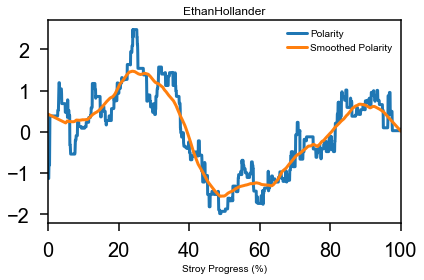

In [6]:
# Normalize the data 
# by shiting by the the mean
# and scaling by the std dev

pol = results[:,1]
pol_norm = (pol-np.mean(pol))/np.std(pol)


# Smooth the data

smooth_window = odd(len(pol_norm)//10)

smooth_pol = savgol_filter(pol_norm, smooth_window, 1)

# Get percentage of story

percent = results[:,0]/results[-1,0]*100


# Plot

plt.title(author)
plt.plot(percent, pol_norm, label="Polarity")
plt.plot(percent, smooth_pol, label="Smoothed Polarity")
plt.legend()
plt.xlim([0,100])
plt.xlabel("Story Progress (%)")
plt.show()

/Users/jennyfothergill/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


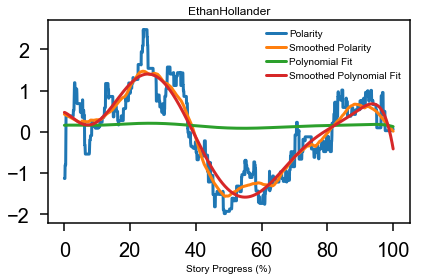

In [9]:
deg = 8

sm_coeffs = np.polyfit(percent,smooth_pol,deg)
coeffs = np.polyfit(percent,pol,deg)


sm_p = np.poly1d(sm_coeffs)
p = np.poly1d(coeffs)


plt.title(author)
plt.plot(percent, pol_norm, label="Polarity")
plt.plot(percent, smooth_pol, label="Smoothed Polarity")
plt.plot(percent, p(percent), label="Polynomial Fit")
plt.plot(percent, sm_p(percent), label="Smoothed Polynomial Fit")
plt.legend()
plt.xlabel("Story Progress (%)")
plt.show()

In [10]:
print(sm_coeffs)

[-7.07801102e-13  2.78093799e-10 -4.36470189e-08  3.44488726e-06
 -1.39979915e-04  2.61094539e-03 -1.44008415e-02 -3.05706710e-02
  4.74151688e-01]
